In [28]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('../../Data/international_matches.csv', delimiter=';')
df.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,tournament,...,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,home_team_score,away_team_score
0,8/8/93,Bolivia,Uruguay,South America,South America,59,22,0,0,FIFA World Cup qualification,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1
1,8/8/93,Brazil,Mexico,South America,North America,8,14,0,0,Friendly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
2,8/8/93,Ecuador,Venezuela,South America,South America,35,94,0,0,FIFA World Cup qualification,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,0
3,8/8/93,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,Friendly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
4,8/8/93,Paraguay,Argentina,South America,South America,67,5,0,0,FIFA World Cup qualification,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3


In [18]:
for it, key in enumerate(df.keys()):
    print(it, key, len(df[df[key].notna()]))
print('From the dataset, after deleting the NaN values, we have found that we have only', len(df[~df.isnull().any(axis=1)]), 'rows remaining.')

0 date 23921
1 home_team 23921
2 away_team 23921
3 home_team_continent 23921
4 away_team_continent 23921
5 home_team_fifa_rank 23921
6 away_team_fifa_rank 23921
7 home_team_total_fifa_points 23921
8 away_team_total_fifa_points 23921
9 tournament 23921
10 city 23921
11 country 23921
12 neutral_location 23921
13 shoot_out 23921
14 home_team_result 23921
15 home_team_goalkeeper_score 8379
16 away_team_goalkeeper_score 8095
17 home_team_mean_defense_score 7787
18 home_team_mean_offense_score 8510
19 home_team_mean_midfield_score 8162
20 away_team_mean_defense_score 7564
21 away_team_mean_offense_score 8312
22 away_team_mean_midfield_score 7979
23 home_team_score 23921
24 away_team_score 23921
From the dataset, after deleting the NaN values, we have found that we have only 4303 rows remaining.


In [20]:
df_without_NaN = df[~df.isnull().any(axis=1)]
df_without_NaN.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,tournament,...,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,home_team_score,away_team_score
8264,3/9/04,Spain,Scotland,Europe,Europe,3,67,0,0,Friendly,...,94.0,84.0,86.5,89.3,89.5,80.2,79.7,81.8,1,1
8266,4/9/04,Austria,England,Europe,Europe,90,7,0,0,FIFA World Cup qualification,...,83.0,88.0,76.2,73.0,74.0,90.5,88.7,91.2,2,2
8271,4/9/04,Croatia,Hungary,Europe,Europe,25,76,0,0,FIFA World Cup qualification,...,77.0,74.0,80.5,78.7,79.0,71.8,75.7,70.2,3,0
8276,4/9/04,Iceland,Bulgaria,Europe,Europe,80,41,0,0,FIFA World Cup qualification,...,78.0,78.0,68.8,77.0,69.2,70.5,79.7,78.5,1,3
8278,4/9/04,Italy,Norway,Europe,Europe,9,38,0,0,FIFA World Cup qualification,...,97.0,79.0,91.8,92.3,87.5,79.2,81.3,79.0,2,1


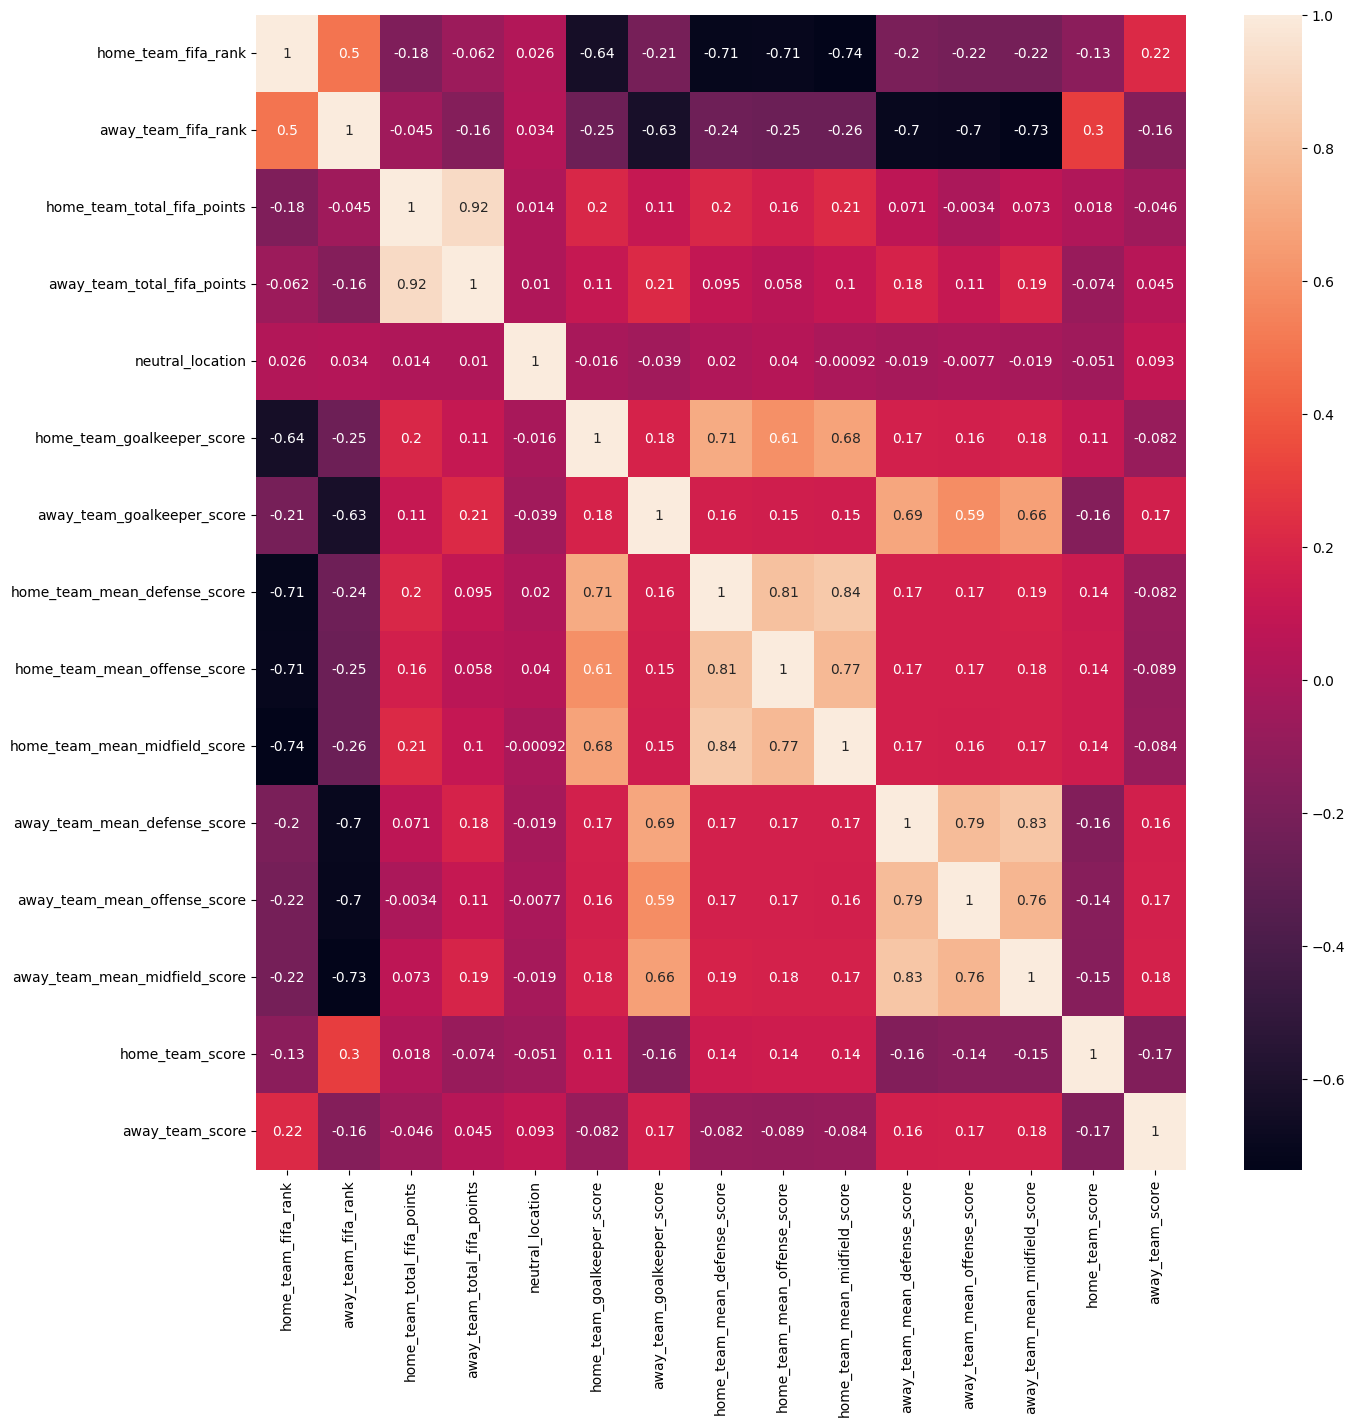

In [30]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 15))
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [27]:
print(set(df_without_NaN['home_team'].to_list() + df_without_NaN['away_team'].to_list()))

{'Georgia', 'Scotland', 'Togo', 'Czech Republic', 'Costa Rica', 'Serbia', 'Israel', 'Argentina', 'USA', 'China PR', 'Peru', 'Cabo Verde', 'Kosovo', 'Belarus', 'Northern Ireland', 'Bulgaria', 'Venezuela', 'Norway', 'South Africa', 'New Zealand', 'Cyprus', 'Moldova', 'Korea Republic', 'Paraguay', 'Ukraine', 'Canada', 'Ghana', 'Mexico', 'Nigeria', 'Italy', 'Greece', 'France', 'Russia', 'Portugal', 'Cameroon', 'Wales', 'Bosnia and Herzegovina', 'England', 'Albania', 'Angola', 'Panama', 'Brazil', 'Chile', 'Netherlands', 'Tunisia', 'Japan', 'Saudi Arabia', 'Sweden', 'India', 'Slovenia', 'Colombia', 'Belgium', "Côte d'Ivoire", 'Germany', 'Algeria', 'Iceland', 'Mali', 'IR Iran', 'Trinidad and Tobago', 'Uruguay', 'Republic of Ireland', 'Montenegro', 'Austria', 'Turkey', 'Burkina Faso', 'Benin', 'Congo DR', 'Senegal', 'Romania', 'Australia', 'Croatia', 'United Arab Emirates', 'Poland', 'Egypt', 'Guinea', 'Spain', 'Denmark', 'Lithuania', 'Hungary', 'Bolivia', 'Honduras', 'Ecuador', 'Finland', 'Co